In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
df = pd.read_csv("suicides.csv")

In [ ]:
print(df.isnull().sum())

State        0
Year         0
Type_code    0
Type         0
Gender       0
Age_group    0
Total        0
dtype: int64


In [ ]:
df.head()

,State,Year,Type_code,Type,Gender,Age_group,Total
0,A & N Islands,2001,Causes,Illness (Aids/STD),Female,0-14,0
1,A & N Islands,2001,Causes,Bankruptcy or Sudden change in Economic,Female,0-14,0
2,A & N Islands,2001,Causes,Cancellation/Non-Settlement of Marriage,Female,0-14,0
3,A & N Islands,2001,Causes,Physical Abuse (Rape/Incest Etc.),Female,0-14,0
4,A & N Islands,2001,Causes,Dowry Dispute,Female,0-14,0


In [ ]:
df.tail()

,State,Year,Type_code,Type,Gender,Age_group,Total
237514,West Bengal,2012,Social_Status,Seperated,Male,0-100+,149
237515,West Bengal,2012,Social_Status,Widowed/Widower,Male,0-100+,233
237516,West Bengal,2012,Social_Status,Married,Male,0-100+,5451
237517,West Bengal,2012,Social_Status,Divorcee,Male,0-100+,189
237518,West Bengal,2012,Social_Status,Never Married,Male,0-100+,2658


In [ ]:


# Assuming df is your DataFrame
df = df[df['Total'] != 0.0]
df.drop(df[df['Total'] == 0.0].index, inplace=True)

# Replace NaN values with 0
df['Total'] = df['Total'].fillna(0)

# Convert the 'Total' column to integers
df['Total'] = df['Total'].astype(int)


In [ ]:
df.head()

,State,Year,Type_code,Type,Gender,Age_group,Total
13,A & N Islands,2001,Causes,Love Affairs,Female,0-14,1
20,A & N Islands,2001,Causes,Other Causes (Please Specity),Female,0-14,1
32,A & N Islands,2001,Causes,Other Prolonged Illness,Male,0-14,1
47,A & N Islands,2001,Causes,Failure in Examination,Male,0-14,1
54,A & N Islands,2001,Causes,Other Prolonged Illness,Female,15-29,8


In [ ]:
df.shape

(102038, 7)

In [ ]:
df.size

714266

In [ ]:
df.nunique()

State          38
Year           12
Type_code       5
Type           69
Gender          2
Age_group       6
Total        2179
dtype: int64

<ipython-input-66-1978292105c3>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_data = df.groupby([df['Year'], 'Gender']).sum().reset_index()


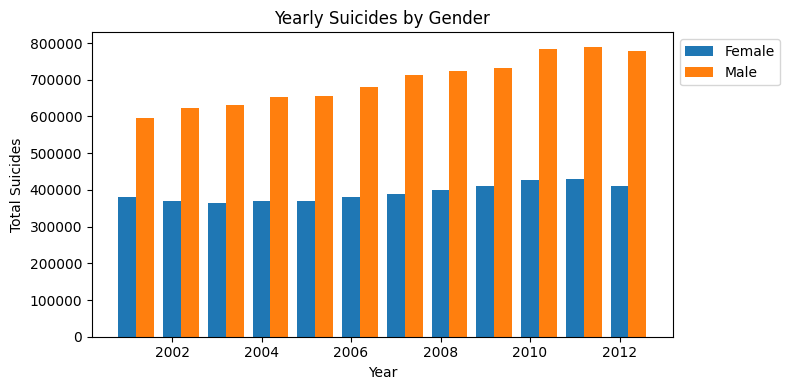

In [ ]:
grouped_data = df.groupby([df['Year'], 'Gender']).sum().reset_index()

plt.figure(figsize=(8, 4))
bar_width = 0.4  # Adjust the width of the bars

for i, gender in enumerate(grouped_data['Gender'].unique()):
    gender_data = grouped_data[grouped_data['Gender'] == gender]
    plt.bar(gender_data['Year'] + i * bar_width, gender_data['Total'], label=gender, width=bar_width)

plt.title('Yearly Suicides by Gender')
plt.xlabel('Year')
plt.ylabel('Total Suicides')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()



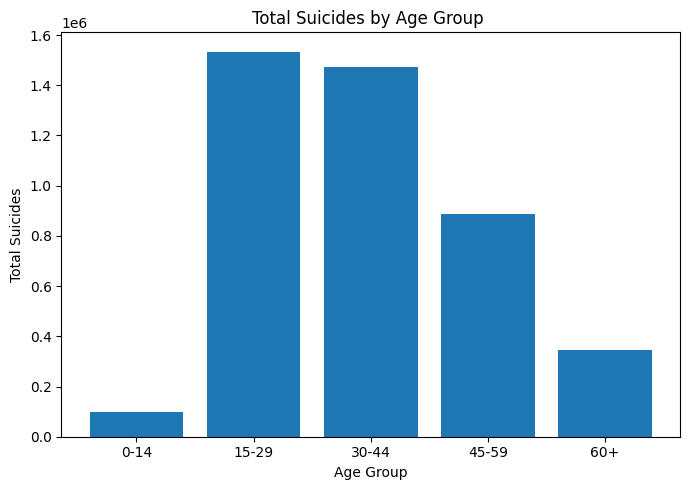

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
filtered_df = df[df['Age_group'] != '0-100+']
# Group by age group and calculate the total suicides
grouped_data = filtered_df.groupby('Age_group')['Total'].sum().reset_index()
# Plot a bar for each age group
plt.figure(figsize=(7, 5))
plt.bar(grouped_data['Age_group'], grouped_data['Total'])
plt.title('Total Suicides by Age Group ')
plt.xlabel('Age Group')
plt.ylabel('Total Suicides')
plt.tight_layout()
plt.show()

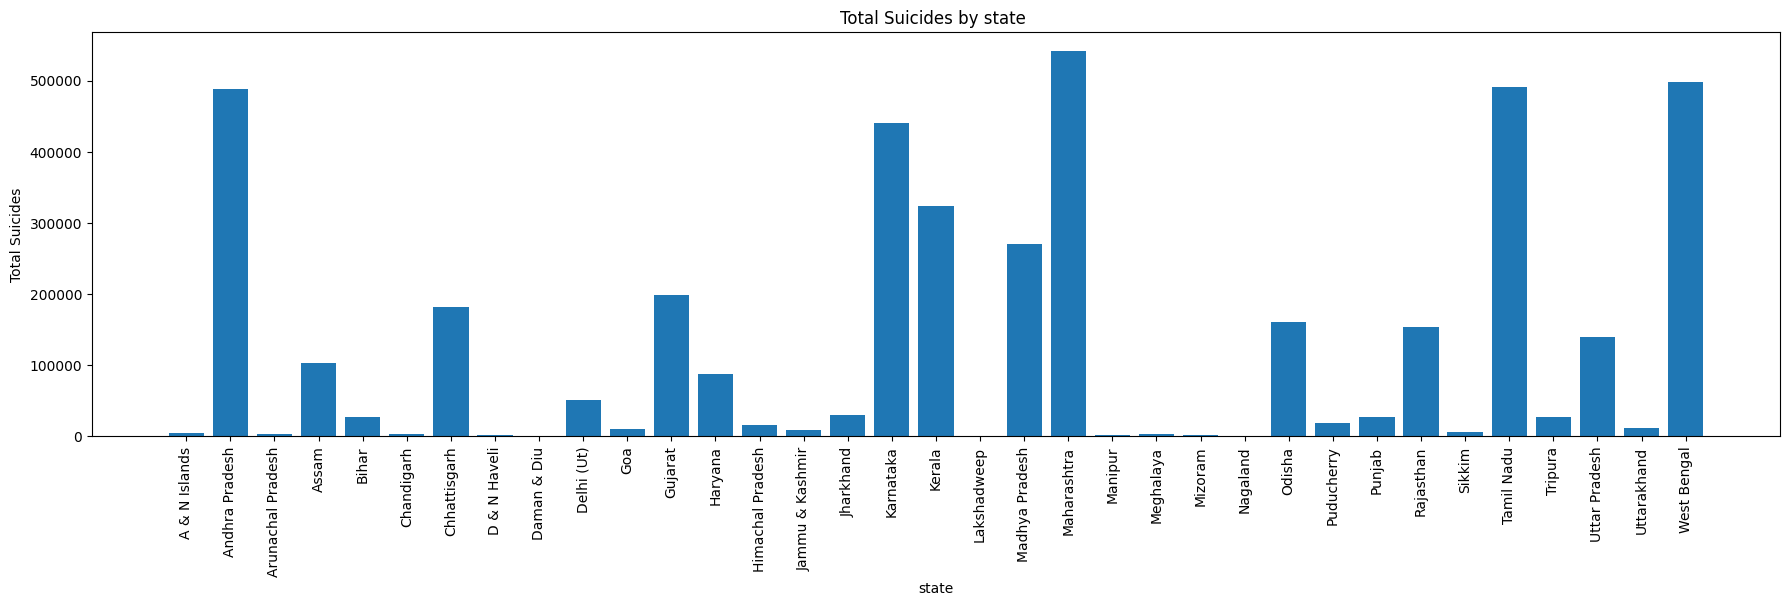

In [ ]:

# Group by age group and calculate the total suicides
grouped_data = filtered_df.groupby('State')['Total'].sum().reset_index()
# Plot a bar for each age group
plt.figure(figsize=(18, 5))
plt.bar(grouped_data['State'], grouped_data['Total'])
plt.title('Total Suicides by state ')
plt.xlabel('state')
plt.ylabel('Total Suicides')
plt.tight_layout()
plt.xticks(rotation='vertical')
plt.show()

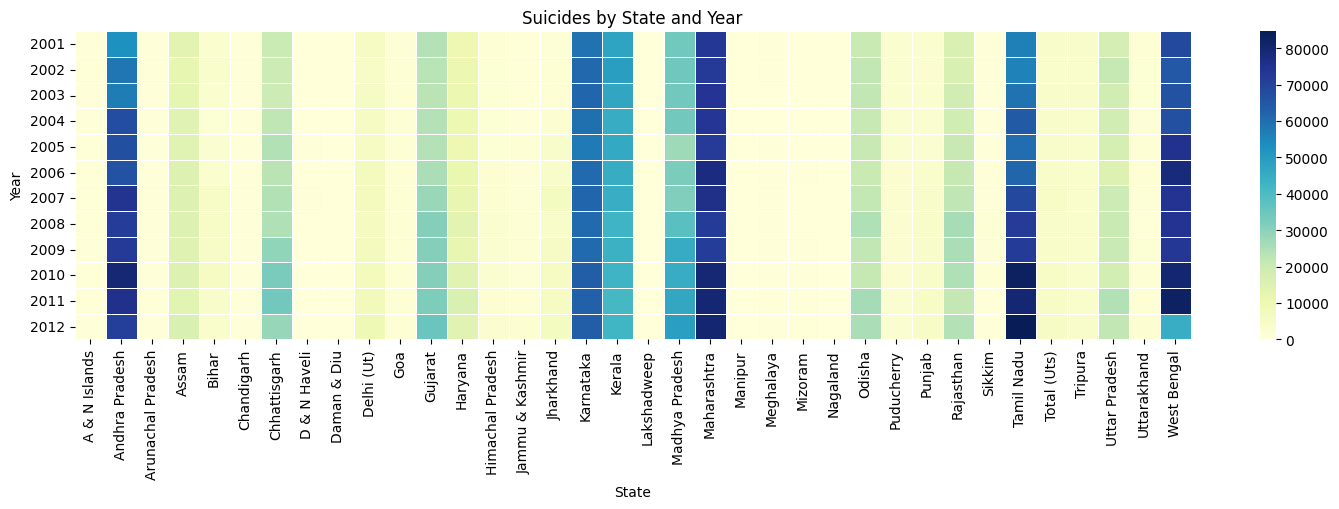

In [ ]:
from matplotlib.ticker import FuncFormatter
# Assuming 'df' is your DataFrame containing the suicide data

# Filter out "Total (India)" and "Total (States)" from the DataFrame
filtered_df = df[~df['State'].isin(['Total (All India)', 'Total (States)'])]

# Pivot the filtered DataFrame to create a matrix for the heatmap
heatmap_data = filtered_df.pivot_table(index='Year', columns='State', values='Total', aggfunc='sum', fill_value=0)

# Set up the heatmap
plt.figure(figsize=(18, 4))
sns.heatmap(heatmap_data, cmap="YlGnBu", linewidths=.5)

# Customize the plot
plt.title('Suicides by State and Year')
plt.xlabel('State')
plt.ylabel('Year')
formatter = FuncFormatter(lambda y, _: int(y)+2001)
plt.gca().yaxis.set_major_formatter(formatter)

# Show the plot
plt.show()





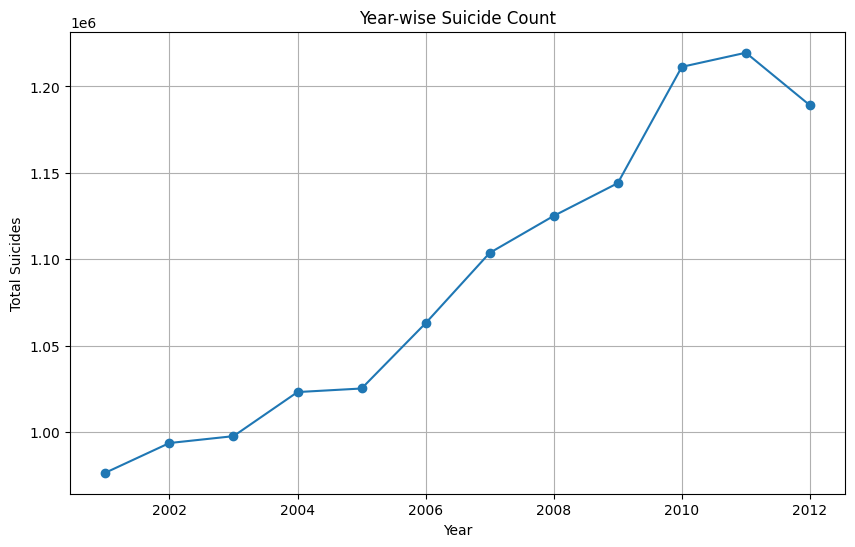

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
df['Year'] = pd.to_datetime(df['Year'], format='%Y')
yearly_suicides = df.groupby(df['Year'].dt.year)['Total'].sum()
plt.figure(figsize=(10, 6))
plt.plot(yearly_suicides.index, yearly_suicides, marker='o', linestyle='-')
plt.title('Year-wise Suicide Count')
plt.xlabel('Year')
plt.ylabel('Total Suicides')
plt.grid(True)
plt.show()



In [ ]:


# Create a subset for causes
causes_set = df[df['Type_code'] == 'Causes']


# Category corrections
pd.options.mode.chained_assignment = None
causes_set.loc[causes_set['Type'].isin(['Bankruptcy or Sudden change in Economic Status', 'Bankruptcy or Sudden change in Economic']), 'Type'] = 'Bankruptcy'
causes_set.loc[causes_set['Type'] == 'Causes Not known', 'Type'] = 'Unknown'
causes_set.loc[causes_set['Type'] == 'Other Causes (Please Specify)', 'Type'] = 'Unknown'
causes_set.loc[causes_set['Type'].isin(['Not having Children(Barrenness/Impotency', 'Not having Children (Barrenness/Impotency']), 'Type'] = 'Infertility'

# Display the counts after corrections
print("\nAfter Category Corrections:")
print(causes_set['Type'].value_counts())



After Category Corrections:
Unknown                                    3332
Other Causes (Please Specity)              3065
Family Problems                            3013
Other Prolonged Illness                    2680
Insanity/Mental Illness                    2572
Love Affairs                               1697
Poverty                                    1568
Death of Dear Person                       1511
Bankruptcy                                 1499
Fall in Social Reputation                  1496
Suspected/Illicit Relation                 1420
Drug Abuse/Addiction                       1406
Unemployment                               1404
Property Dispute                           1393
Failure in Examination                     1379
Cancer                                     1233
Professional/Career Problem                1160
Infertility                                1131
Cancellation/Non-Settlement of Marriage    1116
Paralysis                                  1105
Illness (Ai

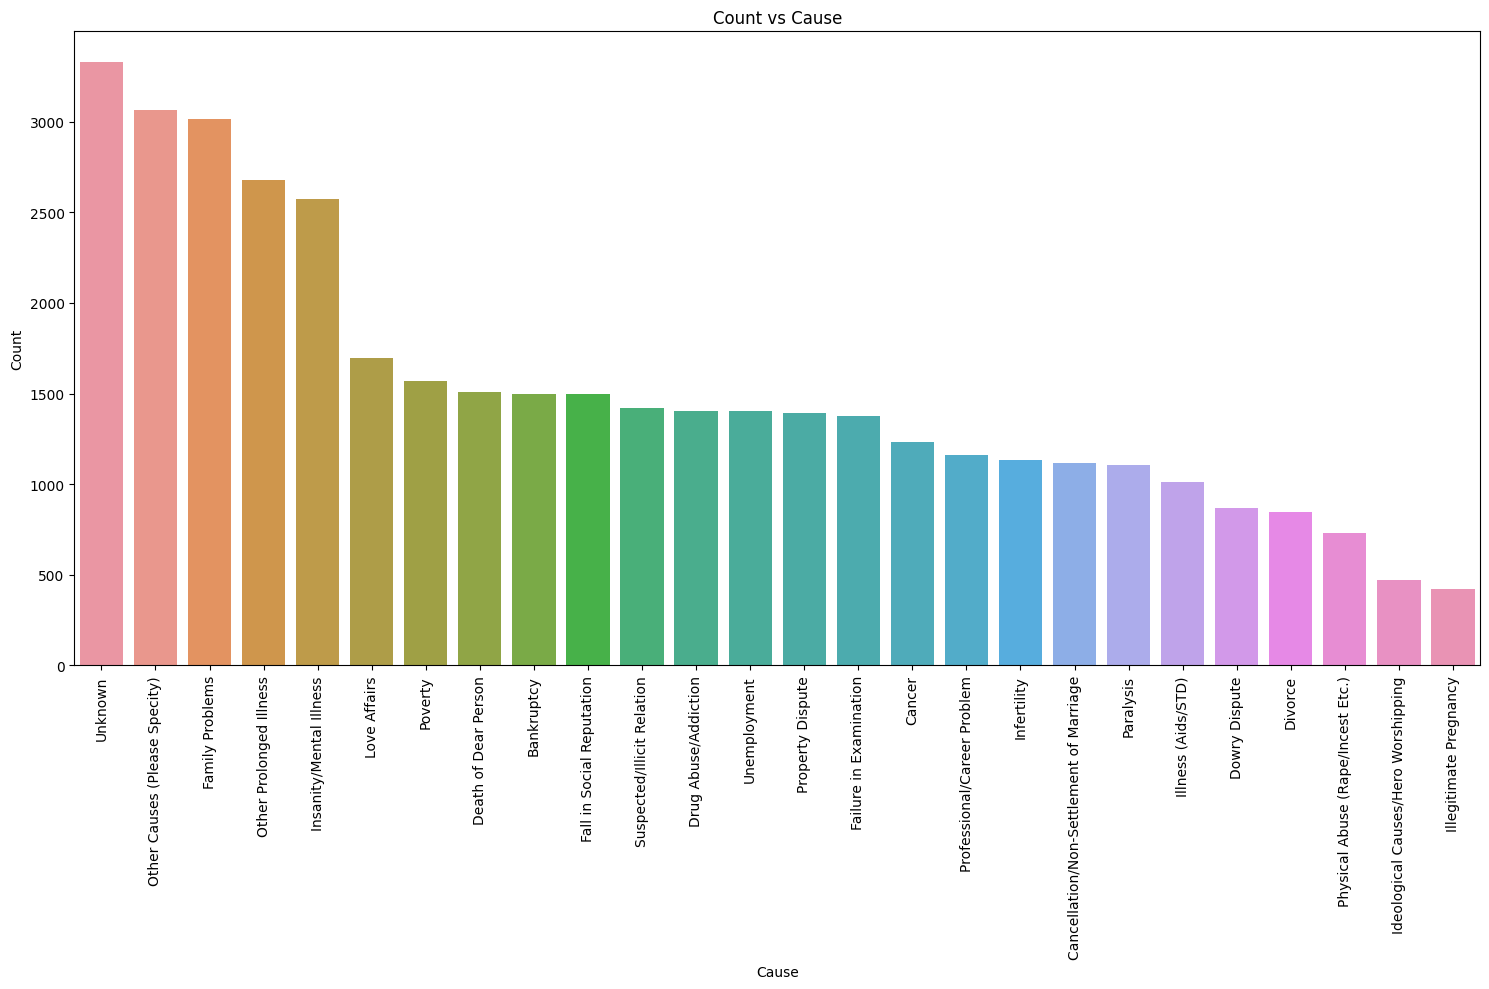

In [ ]:
plt.figure(figsize=(15, 10))
sns.countplot(x='Type', data=causes_set, order=causes_set['Type'].value_counts().index)
plt.title('Count vs Cause')
plt.xlabel('Cause')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
unique_type_codes = df['Type_code'].unique()
print("Unique Type Codes:")
print(unique_type_codes)


Unique Type Codes:
['Causes' 'Education_Status' 'Means_adopted' 'Professional_Profile'
 'Social_Status']


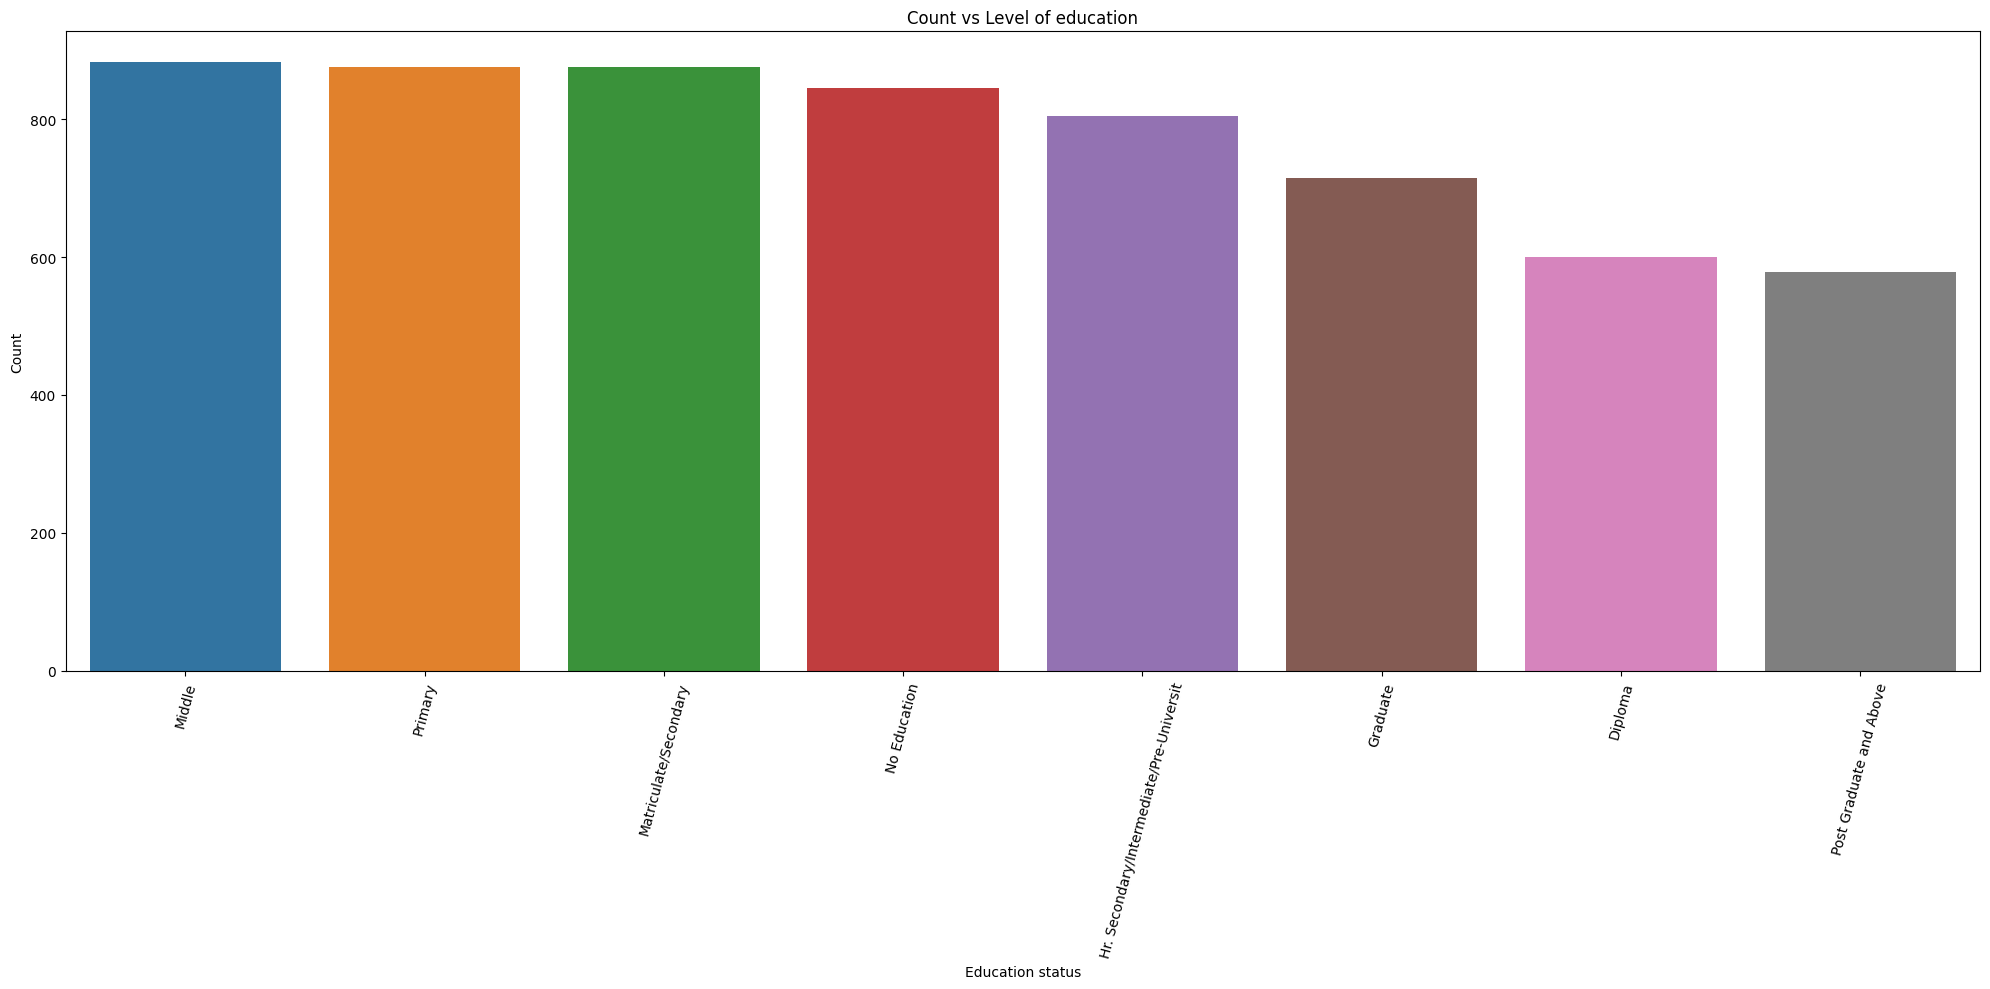

In [ ]:
Education_set = df[df['Type_code'] == 'Education_Status']
plt.figure(figsize=(20, 10))
sns.countplot(x='Type', data=Education_set, order=Education_set['Type'].value_counts().index)
plt.title('Count vs Level of education')
plt.xlabel('Education status')
plt.ylabel('Count')
plt.xticks(rotation=75)
plt.tight_layout()
plt.show()

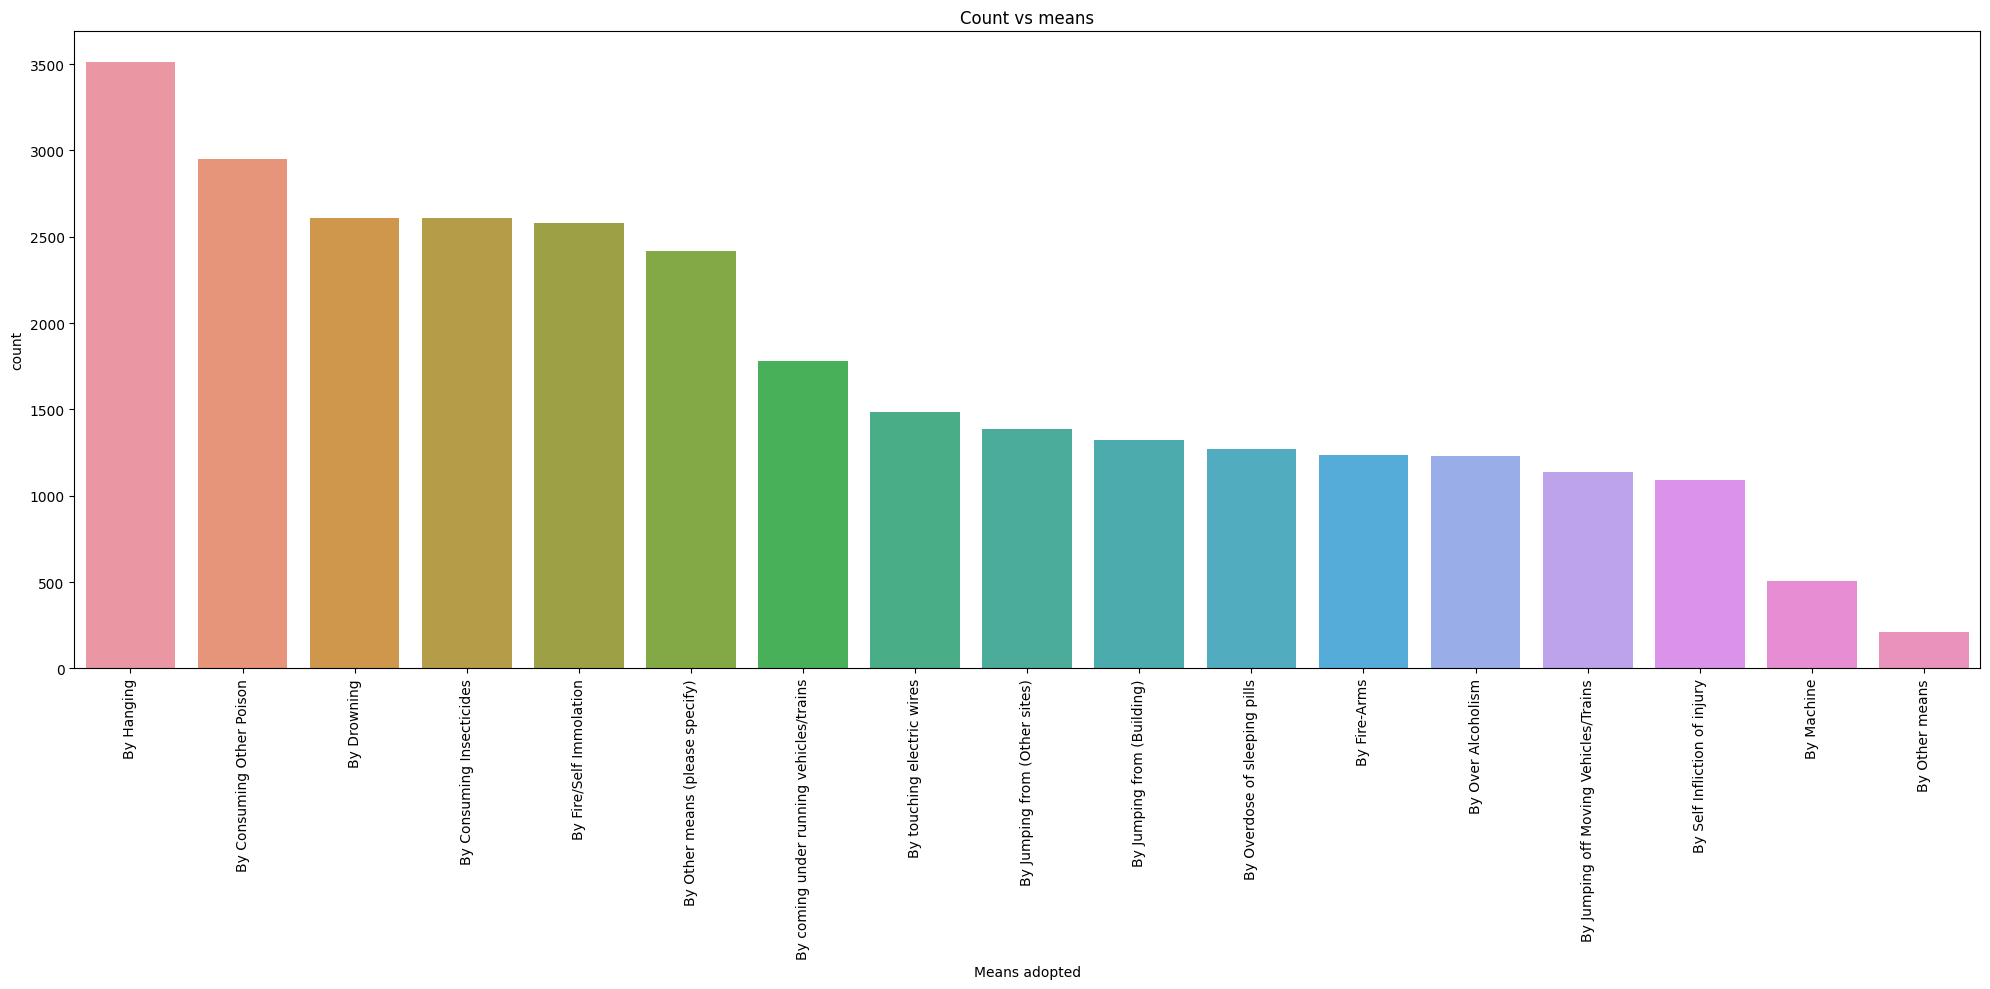

In [ ]:
Means_set = df[df['Type_code'] == 'Means_adopted']
plt.figure(figsize=(20, 10))
sns.countplot(x='Type', data=Means_set, order=Means_set['Type'].value_counts().index)
plt.title('Count vs means')
plt.xlabel('Means adopted')
plt.ylabel('count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

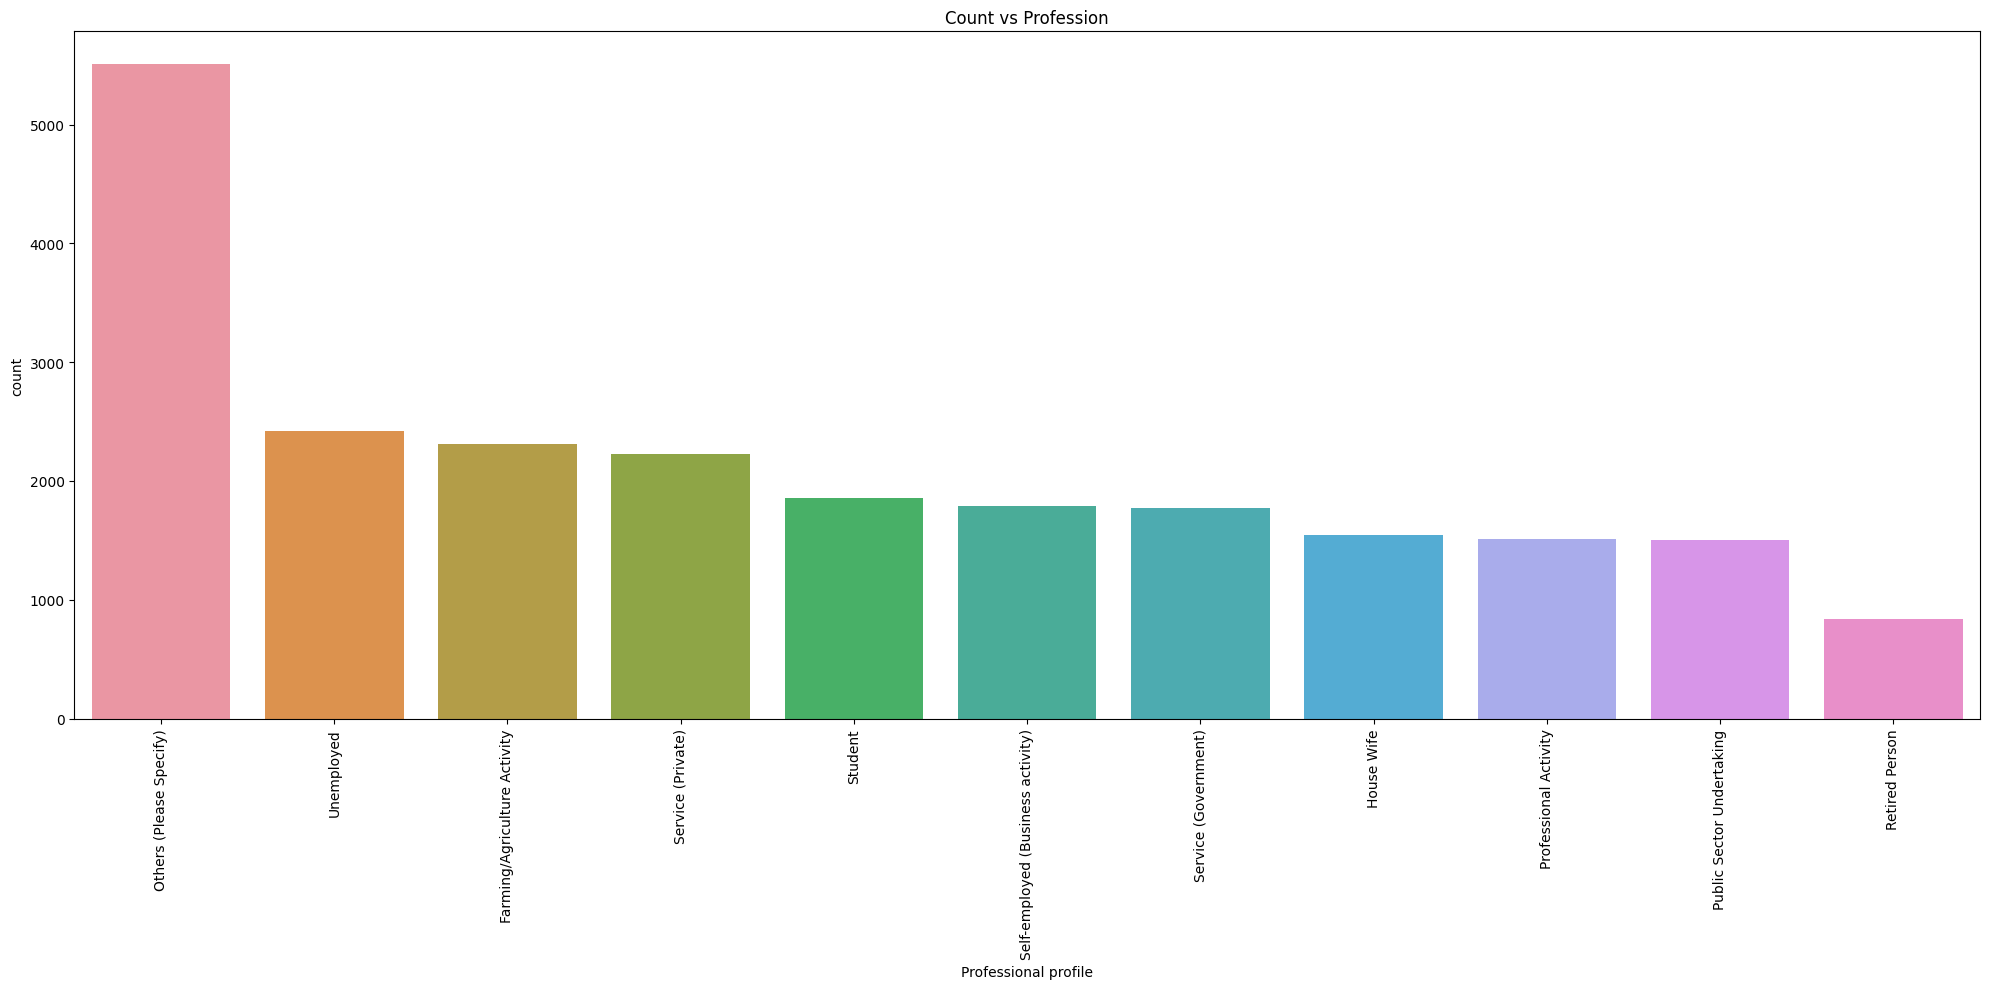

In [ ]:
p_set = df[df['Type_code'] == 'Professional_Profile']
plt.figure(figsize=(20, 10))
sns.countplot(x='Type', data=p_set, order=p_set['Type'].value_counts().index)
plt.title('Count vs Profession')
plt.xlabel('Professional profile')
plt.ylabel('count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

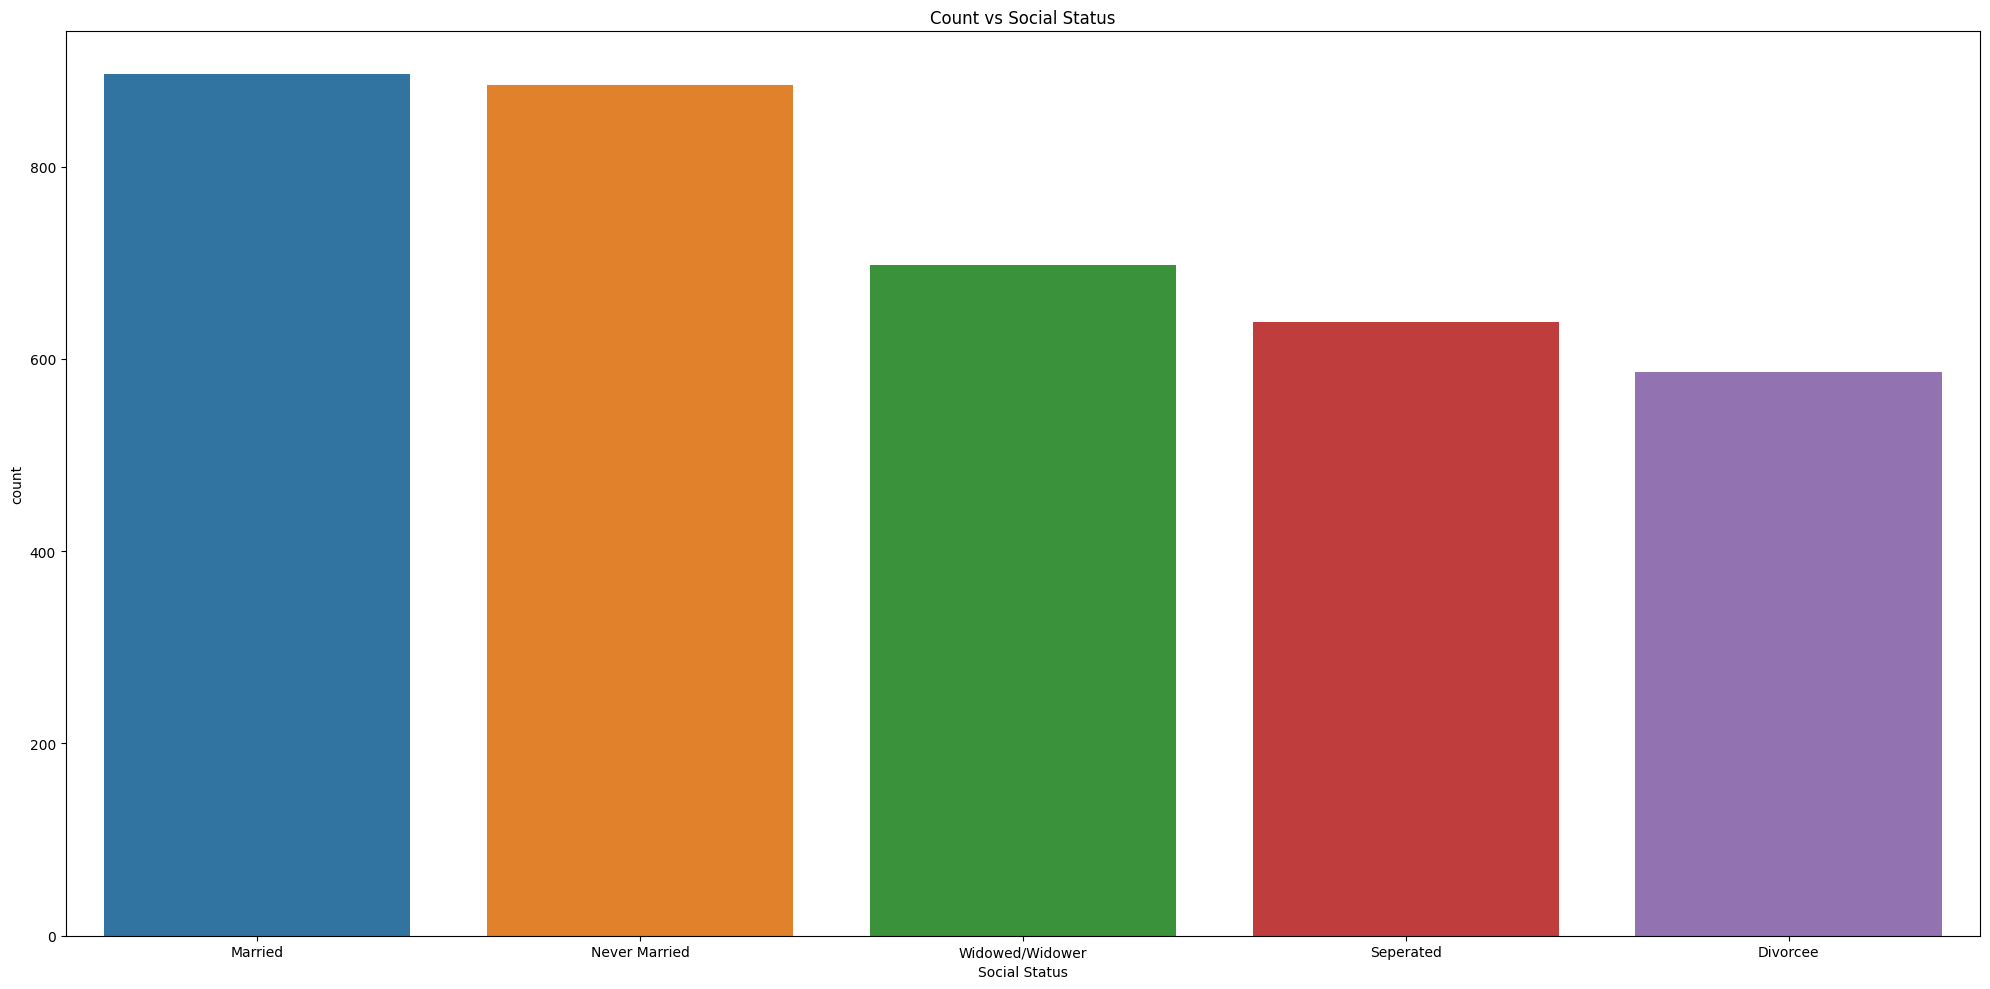

In [ ]:
ss_set = df[df['Type_code'] == 'Social_Status']
plt.figure(figsize=(20, 10))
sns.countplot(x='Type', data=ss_set , order=ss_set['Type'].value_counts().index)
plt.title('Count vs Social Status')
plt.xlabel('Social Status')
plt.ylabel('count')
plt.tight_layout()
plt.show()

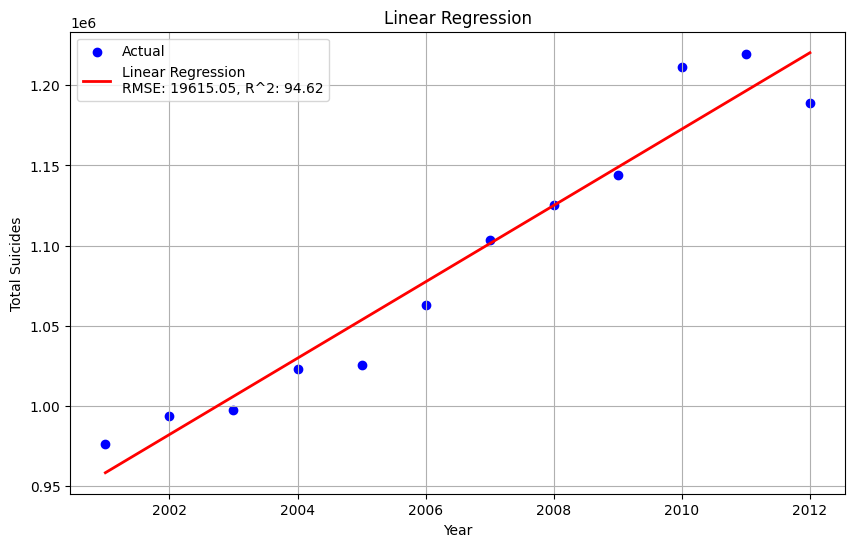

RMSE: 19615.046394220193
R^2: 0.95
Equation of the line: y = 23818.19x + -46701884.68


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming 'yearly_suicides' is your DataFrame with yearly suicide data

# Prepare data for linear regression
X = np.array(yearly_suicides.index).reshape(-1, 1)
y = yearly_suicides.values.reshape(-1, 1)

# Fit linear regression model
model = LinearRegression()
model.fit(X, y)

# Extract slope (m) and y-intercept (b)
slope = model.coef_[0][0]
intercept = model.intercept_[0]

# Predict for the original X values
y_pred = model.predict(X)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y, y_pred))

# Calculate R-squared value
r2 = r2_score(y, y_pred)

# Plot the actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(yearly_suicides.index, yearly_suicides, color='blue', marker='o', label='Actual')
plt.plot(yearly_suicides.index, y_pred, color='red', linestyle='-', linewidth=2, label=f'Linear Regression\nRMSE: {rmse:.2f}, R^2: {r2*100:.2f}')
plt.title('Linear Regression')
plt.xlabel('Year')
plt.ylabel('Total Suicides')
plt.legend()
plt.grid(True)
plt.show()

# Display the equation of the line
equation = f'Equation of the line: y = {slope:.2f}x + {intercept:.2f}'
print('RMSE:', rmse)
print(f'R^2: {r2:.2f}')
print(equation)




In [ ]:
a= [2016,2017,2018,2019,2020]
for x in a:
  y = 8269.25*x -16179974.70
  print(int(y))

490833
499102
507371
515641
523910
